In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mne

In [3]:
raw = mne.io.read_raw_edf('SC4001E0-PSG (2).edf')
annot = mne.read_annotations('SC4001EC-Hypnogram.edf')
raw.set_annotations(annot,emit_warning=False)

Extracting EDF parameters from C:\Users\HP\project\tutorial\SC4001E0-PSG (2).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SC4001E0-PSG (2).edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>

Using matplotlib as 2D backend.


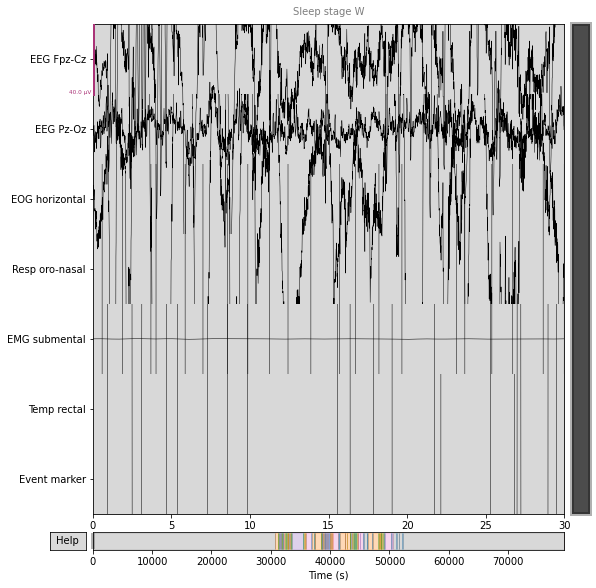

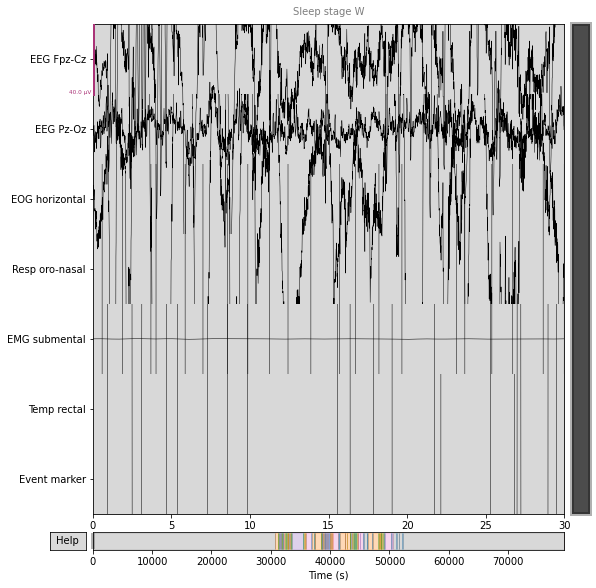

In [4]:
raw.plot(start=0,duration=30)

In [5]:
data = raw.get_data()
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
7949995,0.000011,-6.882051e-06,0.000082,120.019895,0.000003,37.430325,884.192595
7949996,0.000004,-8.609524e-06,0.000062,119.233020,0.000003,37.430079,883.955098
7949997,0.000005,-3.043223e-06,0.000070,118.437162,0.000003,37.429827,883.717035
7949998,-0.000005,-3.715018e-06,0.000081,117.632748,0.000003,37.429568,883.478461


In [6]:
annot_df = annot.to_data_frame()
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,Sleep stage W
1,1970-01-01 08:30:30,120.0,Sleep stage 1
2,1970-01-01 08:32:30,390.0,Sleep stage 2
3,1970-01-01 08:39:00,30.0,Sleep stage 3
4,1970-01-01 08:39:30,30.0,Sleep stage 2
...,...,...,...
149,1970-01-01 14:19:00,30.0,Sleep stage 1
150,1970-01-01 14:19:30,540.0,Sleep stage W
151,1970-01-01 14:28:30,150.0,Sleep stage 1
152,1970-01-01 14:31:00,27240.0,Sleep stage W


In [7]:
label = {'Sleep stage 1':1,'Sleep stage 2':2,'Sleep stage 3':3,'Sleep stage W':0,'Sleep stage 4':3,'Sleep stage R':4,'Sleep stage ?':-1,'Movement time':-1}
annot_df['description'] = annot_df['description'].replace(label)
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,0
1,1970-01-01 08:30:30,120.0,1
2,1970-01-01 08:32:30,390.0,2
3,1970-01-01 08:39:00,30.0,3
4,1970-01-01 08:39:30,30.0,2
...,...,...,...
149,1970-01-01 14:19:00,30.0,1
150,1970-01-01 14:19:30,540.0,0
151,1970-01-01 14:28:30,150.0,1
152,1970-01-01 14:31:00,27240.0,0


In [8]:
annot_df.groupby(['description']).sum()

,duration
description,
-1,6900.0
0,59910.0
1,1740.0
2,7500.0
3,6600.0
4,3750.0


In [9]:
annot_list = []
for i in range(0,153):
    dur = int(annot_df.iloc[i,1])
    des = int(annot_df.iloc[i,2])
    for j in range(0,dur):
        annot_list.append(des)

In [10]:
cols = ['Stages']
annot_list = pd.DataFrame(annot_list,columns=cols)
annot_list

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
79495,0
79496,0
79497,0
79498,0


In [11]:
df = df.iloc[0:79500]
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
79495,0.000033,1.068059e-05,0.000001,189.825492,0.000003,37.253137,905.379169
79496,0.000067,9.145055e-06,0.000002,189.069777,0.000003,37.253041,905.312811
79497,0.000025,7.993407e-06,-0.000031,188.308952,0.000003,37.252948,905.241653
79498,0.000032,7.609524e-06,-0.000053,187.543434,0.000003,37.252859,905.165756


In [12]:
df_stats = df.describe()

In [13]:
df_stats = df_stats.transpose()

In [14]:
df_stats

,count,mean,std,min,25%,50%,75%,max
0,79500.0,1.811138e-07,2.561919e-05,-0.000125,-0.000012,5.157509e-07,0.000013,0.000157
1,79500.0,-3.464879e-07,7.185456e-06,-0.000048,-0.000005,-4.520147e-07,0.000004,0.000056
2,79500.0,7.427894e-07,8.184781e-05,-0.000386,-0.000036,-2.463980e-07,0.000035,0.000445
3,79500.0,2.772545e+02,3.497052e+02,-907.900006,181.378693,2.211806e+02,317.617642,2015.034675
4,79500.0,3.422791e-06,7.126552e-08,0.000003,0.000003,3.422624e-06,0.000003,0.000004
5,79500.0,3.721832e+01,2.517206e-02,37.143711,37.200739,3.721811e+01,37.235538,37.325715
6,79500.0,8.896052e+02,5.765405e+01,-2.770382,879.616700,8.935192e+02,907.264523,1021.897795


In [15]:
def norm(x):
    return (x - df_stats['mean']) / df_stats['std']

df = norm(df)

In [16]:
df

,0,1,2,3,4,5,6
0,0.188754,-0.295167,0.192624,-2.171127,1.813066,-0.471340,0.527193
1,-0.107727,0.252439,0.186603,-2.158298,1.834960,-0.483177,0.514208
2,0.046004,-0.522223,0.108332,-2.144797,1.856496,-0.494663,0.501203
3,-0.100406,-0.321880,0.011998,-2.130625,1.877656,-0.505789,0.488190
4,-0.210214,-0.054755,0.084248,-2.115783,1.898424,-0.516544,0.475179
...,...,...,...,...,...,...,...
79495,1.283172,1.534638,0.005977,-0.250008,0.946352,1.383297,0.273597
79496,2.589885,1.320938,0.011998,-0.252169,0.930013,1.379503,0.272446
79497,0.975710,1.160663,-0.385380,-0.254344,0.913086,1.375822,0.271212
79498,1.250230,1.107238,-0.656320,-0.256533,0.895582,1.372258,0.269895


In [17]:
df.iloc[0,0]

0.18875446192609638

In [18]:
df.iloc[0,1]

-0.2951672478131336

In [19]:
a = annot_list.values

In [20]:
a[40000][0]

2

In [21]:
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []

for i in range(0,79500):
    if(a[i][0] == 3):
        X0.append(df.iloc[i,0])
        X1.append(df.iloc[i,1])
        X2.append(df.iloc[i,2])
        X3.append(df.iloc[i,3])
        X4.append(df.iloc[i,4])
        X5.append(df.iloc[i,5])
        X6.append(df.iloc[i,6])


In [22]:
X0

[-0.8507594349018942,
 -0.7629131900995288,
 -1.6340551177229858,
 -2.4356521015445702,
 -2.571081728948217,
 -2.984691131559354,
 -3.039595034560832,
 -3.1494028405637886,
 -3.2262683047658585,
 -2.981030871359255,
 -2.8089986419546227,
 -2.743113958352849,
 -2.4539534025450624,
 -2.2233570099388538,
 -1.9195554133306736,
 -1.8573309899289978,
 -1.7511834441261394,
 -1.6267345973227887,
 -1.392477944516481,
 -1.355875342515495,
 -0.9642275011049496,
 -1.059394266307512,
 -1.011810883706231,
 -1.202144414111356,
 -1.1655418121103702,
 -0.4957141954923341,
 -1.6816385003242669,
 -0.4261692516904615,
 -0.2980601446870119,
 -0.5103552362927283,
 1.8541728529709405,
 1.7773073887688708,
 1.6052751593642387,
 1.8322112917703492,
 1.52474943496207,
 1.1184605527511302,
 1.2465696597545797,
 0.7341332317407816,
 0.829299996943344,
 0.6865498491395003,
 0.22535706392708196,
 0.34614565053033436,
 0.3058827883292502,
 0.6682485481390075,
 0.21437628332678624,
 0.23633784452737763,
 0.1814339415

In [23]:
X1

[-1.8311351387832049,
 -1.6708602284211105,
 -1.3636666502270962,
 -1.336954165166747,
 -1.0164043444425583,
 -1.136610527214129,
 -1.0164043444425583,
 -1.6575039858909357,
 -1.978053806615125,
 -1.2301042249253509,
 -1.6708602284211105,
 -0.856129434080464,
 -0.9095544042011621,
 -1.3503104076969217,
 -1.1232542846839544,
 -1.136610527214129,
 0.3860011212257676,
 0.5062073039973384,
 0.25243869592402224,
 -0.5222233708261007,
 -0.8961981616709875,
 -0.8694856766106385,
 -0.8427731915502894,
 -0.2150297926320864,
 -1.283529195046049,
 -0.16160482251138827,
 -0.9496231317916856,
 0.5863447591783857,
 -0.4687984007054026,
 -0.33523597540365724,
 0.7332634270103056,
 1.0404570052043198,
 1.5079254937604283,
 0.8935383373724,
 1.0671694902646687,
 1.9753939823165372,
 2.2158063478596786,
 -0.37530470299418084,
 0.09216378556192786,
 0.8935383373724,
 0.546276031587862,
 0.46613857640681483,
 0.2257262108636732,
 0.15894499821280053,
 -1.2968854375762235,
 -0.028042397209642928,
 0.586344

In [24]:
X2

[-0.6081530888954535,
 -0.4516101360547715,
 -0.8670510493627349,
 -1.035635767806546,
 -1.3547425562894744,
 -1.3306590250832158,
 -1.5173063919317211,
 -1.655786696367709,
 -1.73405817278805,
 -1.559452571542674,
 -1.5714943371458032,
 -1.4149513843051214,
 -1.4149513843051214,
 -1.131969892631581,
 -1.1560534238378397,
 -1.0055313537987227,
 -1.0235940022034167,
 -1.0296148850049813,
 -0.999510470997158,
 -0.8429675181564761,
 -0.9694060569893346,
 -0.752654276133006,
 -0.6322366201017121,
 -0.8188839869502174,
 -0.5900904404907593,
 -0.6201948544985828,
 -0.5539651436813713,
 0.10231108168917943,
 0.27089580013299064,
 0.29497933133924936,
 1.1499446891614347,
 1.1981117515739523,
 1.0837149783442233,
 1.2101535171770816,
 0.7947126038691184,
 0.8729840802894592,
 1.065652329939529,
 1.0475896815348351,
 0.8729840802894592,
 0.9091093770988474,
 0.8850258458925885,
 0.6502114166315659,
 0.7525664242581656,
 0.4695849325846253,
 0.7405246586550361,
 0.4033552217674138,
 0.3973343389

In [25]:
X3

[0.1691271849902842,
 0.17074191336136982,
 0.17235798960909907,
 0.17397471761868213,
 0.17559140488840314,
 0.1772073629005262,
 0.17882190748760038,
 0.18043435919393294,
 0.18204404363198148,
 0.18365029183344225,
 0.18525244059480192,
 0.186849832817127,
 0.1884418178398787,
 0.19002775176853853,
 0.19160699779583243,
 0.19317892651636198,
 0.1947429162344359,
 0.19629835326492315,
 0.19784463222693185,
 0.19938115633014847,
 0.20090733765365756,
 0.20242259741708157,
 0.2039263662438815,
 0.20541808441666537,
 0.2068972021243643,
 0.2083631797011332,
 0.2098154878568487,
 0.21125360789907904,
 0.21267703194641155,
 0.2140852631330257,
 0.2480533307749845,
 0.24878621422605446,
 0.249494484315089,
 0.25017807447009205,
 0.25083693048411615,
 0.2514710103950064,
 0.25208028435755037,
 0.25266473450818255,
 0.25322435482242295,
 0.25375915096520874,
 0.2542691401342967,
 0.25475435089692194,
 0.2552148230198884,
 0.2556506072932895,
 0.25606176534804514,
 0.2564483694674568,
 0.2568

In [26]:
X4

[-1.3668603895627192,
 -1.3514058599708614,
 -1.3353848015068708,
 -1.3188050209394726,
 -1.3016746168238218,
 -1.284001974936284,
 -1.265795763550928,
 -1.2470649285604192,
 -1.2278186884441409,
 -1.2080665290863375,
 -1.187818198447305,
 -1.1670837010906334,
 -1.145873292569594,
 -1.124197473676023,
 -1.102066984554825,
 -1.0794927986874683,
 -1.0564861167480437,
 -1.0330583603352361,
 -1.0092211655838428,
 -0.9849863766595747,
 -0.9603660391406533,
 -0.9353723932901619,
 -0.9100178672230118,
 -0.8843150699711275,
 -0.8582767844512351,
 -0.8319159603389027,
 -0.8052457068532369,
 -0.7782792854559325,
 -0.7510301024692849,
 -0.7235117016171794,
 0.18535035361824653,
 0.21391977264842746,
 0.24228581022183623,
 0.2704349449222757,
 0.2983537927121872,
 0.3260291141653601,
 0.35344782161065447,
 0.38059698618281346,
 0.40746384477610553,
 0.43403580689708743,
 0.4603004614122155,
 0.4862455831867154,
 0.5118591396108542,
 0.5371292970096141,
 0.5620444269325304,
 0.5865931123196221,
 0.

In [27]:
X5

[-0.6145887196794575,
 -0.6083605702231724,
 -0.6021762269979704,
 -0.596043340962802,
 -0.5899695024104837,
 -0.5839622331077677,
 -0.5780289785110597,
 -0.5721771000659736,
 -0.5664138675991889,
 -0.560746451806,
 -0.5551819168425889,
 -0.5497272130348765,
 -0.5443891696977449,
 -0.5391744880877734,
 -0.5340897344798952,
 -0.5291413333877297,
 -0.524335560926465,
 -0.5196785383228042,
 -0.515176225586091,
 -0.5108344153383556,
 -0.5066587268117497,
 -0.5026546000221203,
 -0.4988272901167464,
 -0.4951818619106363,
 -0.4917231846048906,
 -0.48845592670773913,
 -0.48538455114272494,
 -0.4825133105683128,
 -0.4798462429004524,
 -0.47738716704628265,
 -0.5140564439783958,
 -0.5188218836615195,
 -0.5237841697127638,
 -0.5289388050522525,
 -0.534281073090827,
 -0.5398060419664192,
 -0.5455085689828181,
 -0.551383305257881,
 -0.5574247005735737,
 -0.5636270084213425,
 -0.5699842912428208,
 -0.5764904258562732,
 -0.5831391090639757,
 -0.5899238634442049,
 -0.5968380433086391,
 -0.603874840828

In [28]:
X6

[0.04342726015235065,
 0.04500313554188441,
 0.04653007325832729,
 0.048003671589398555,
 0.04941955807823066,
 0.050773394097413486,
 0.052060879403623514,
 0.0532777566684563,
 0.05441981598134117,
 0.055482899320349686,
 0.05646290498674525,
 0.05735579199912296,
 0.05815758444303825,
 0.0588643757720839,
 0.05947233305635732,
 0.059977701174368396,
 0.06037680694434563,
 0.06066606319120368,
 0.060841972745144024,
 0.06090113236828979,
 0.06084023660541908,
 0.060656081555320256,
 0.06034556855905421,
 0.05990570780157619,
 0.05933362182333943,
 0.05862654893842762,
 0.057781846555929384,
 0.05679699440130285,
 0.05566959763463074,
 0.05439738986263251,
 -0.06253161621175636,
 -0.06875398258735553,
 -0.07511148781088149,
 -0.08160114744189313,
 -0.0882198260565439,
 -0.09496423917862153,
 -0.10183095535032309,
 -0.10881639834125473,
 -0.11591684949417345,
 -0.1231284502055956,
 -0.13044720453947745,
 -0.13786898197202202,
 -0.14538952026547833,
 -0.15300442846873633,
 -0.1607091900

In [29]:
import scipy.stats as st

In [30]:
st.t.interval(alpha=0.90, df=len(X0)-1,
              loc=np.mean(X0),
              scale=st.sem(X0))

C:\Users\HP\AppData\Local\Temp/ipykernel_9380/717390456.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X0)-1,


(-0.06285072112607709, -0.010954874372912909)

In [31]:
st.t.interval(alpha=0.90, df=len(X1)-1,
              loc=np.mean(X1),
              scale=st.sem(X1))

C:\Users\HP\AppData\Local\Temp/ipykernel_9380/3723661251.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X1)-1,


(-0.06116525964464935, -0.020608041241005567)

In [32]:
st.t.interval(alpha=0.90, df=len(X2)-1,
              loc=np.mean(X2),
              scale=st.sem(X2))

C:\Users\HP\AppData\Local\Temp/ipykernel_9380/2606998258.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X2)-1,


(-0.014270208809100855, 0.02461672928036599)

In [33]:
st.t.interval(alpha=0.90, df=len(X3)-1,
              loc=np.mean(X3),
              scale=st.sem(X3))

C:\Users\HP\AppData\Local\Temp/ipykernel_9380/3860025406.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X3)-1,


(0.02065129260852156, 0.025199686654110705)

In [34]:
st.t.interval(alpha=0.90, df=len(X4)-1,
              loc=np.mean(X4),
              scale=st.sem(X4))

C:\Users\HP\AppData\Local\Temp/ipykernel_9380/1715302051.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X4)-1,


(-0.38446424048249755, -0.3521310555540164)

In [35]:
st.t.interval(alpha=0.90, df=len(X5)-1,
              loc=np.mean(X5),
              scale=st.sem(X5))

C:\Users\HP\AppData\Local\Temp/ipykernel_9380/3134699342.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X5)-1,


(-0.4312080692820976, -0.4013979501412774)

In [36]:
st.t.interval(alpha=0.90, df=len(X6)-1,
              loc=np.mean(X6),
              scale=st.sem(X6))

C:\Users\HP\AppData\Local\Temp/ipykernel_9380/2686493811.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X6)-1,


(-0.10087113745600335, -0.08648515906028384)